In [74]:
from os import listdir
from os.path import isfile, join
from os.path import exists
import cv2
import matplotlib.pyplot as plt
import matplotlib.colors as mc
import webcolors
from PIL import Image

In [15]:
mypath = r"C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\Simon_Resources\pics_from_tello_pov"

onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['frame0.jpg', 'frame1.jpg', 'frame10.jpg', 'frame100.jpg', 'frame101.jpg', 'frame102.jpg', 'frame103.jpg', 'frame104.jpg', 'frame105.jpg', 'frame106.jpg', 'frame107.jpg', 'frame108.jpg', 'frame109.jpg', 'frame11.jpg', 'frame110.jpg', 'frame111.jpg', 'frame112.jpg', 'frame113.jpg', 'frame114.jpg', 'frame115.jpg', 'frame116.jpg', 'frame117.jpg', 'frame118.jpg', 'frame119.jpg', 'frame12.jpg', 'frame120.jpg', 'frame121.jpg', 'frame122.jpg', 'frame123.jpg', 'frame124.jpg', 'frame125.jpg', 'frame126.jpg', 'frame127.jpg', 'frame128.jpg', 'frame129.jpg', 'frame13.jpg', 'frame130.jpg', 'frame131.jpg', 'frame132.jpg', 'frame133.jpg', 'frame134.jpg', 'frame135.jpg', 'frame136.jpg', 'frame137.jpg', 'frame138.jpg', 'frame139.jpg', 'frame14.jpg', 'frame140.jpg', 'frame141.jpg', 'frame142.jpg', 'frame143.jpg', 'frame144.jpg', 'frame145.jpg', 'frame146.jpg', 'frame147.jpg', 'frame148.jpg', 'frame149.jpg', 'frame15.jpg', 'frame150.jpg', 'frame151.jpg', 'frame152.jpg', 'frame153.jpg', 'frame154.jpg', '

In [149]:
        
def PlotCv2ImageWithPlt(image, name = "no name"):
    RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_img, interpolation='none')
    plt.title(name)
    plt.show()
    
def ReadFileFun(file_name , dir_name):
    img = cv2.imread(dir_name + file_name)
    #PlotCv2ImageWithPlt(img, "original image "+ str(file_name))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
    dst = cv2.Canny(gray, 0, 150)
    blured = cv2.blur(dst, (5,5), 0)    
    MIN_CONTOUR_AREA=800 # 1200
    img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    Contours,imgContours = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    i = 0;
    for contour in Contours:
        (xc,yc,w,h) = cv2.boundingRect(contour)
        if (w > 200) and (h >200) and (yc > 1) and (xc > 1) and (1.8*h>w>1.3*h):
            i += 1
            print (f"xc {xc}, yc {yc}, w {w}, h {h}")
            cropped_image = img[yc:yc+h,xc:xc+w]
            PlotCv2ImageWithPlt(img, "original image "+ str(file_name))
            PlotCv2ImageWithPlt(cropped_image, "screen image" + str(file_name))
            
def GetColorName(rgb_triplet):
    min_colours = {}
    for name, key in mc.CSS4_COLORS.items():
        r_c, g_c, b_c = webcolors.hex_to_rgb(key)
        rd = (r_c - rgb_triplet[0]) ** 2
        gd = (g_c - rgb_triplet[1]) ** 2
        bd = (b_c - rgb_triplet[2]) ** 2
        min_colours[(rd + gd + bd)] = name
    return min_colours[min(min_colours.keys())]


def CompareMainColorDistance(cropped_image , rgb_triplet):
    tuple(img[int(yc+h/2), int(xc+w/2)])
    
    


def get_dominant_color(file_full_path,bb, palette_size=16):
    # Resize image to speed up processing
    pil_img = Image.open(file_full_path)
    #img = pil_img[bb[1]:bb[1]+bb[3],bb[0]:bb[0]+bb[2]].copy()
    img = pil_img.crop((bb[0], bb[1], bb[0]+bb[2], bb[1]+bb[3]))
    img.thumbnail((100, 100))

    # Reduce colors (uses k-means internally)
    paletted = img.convert('P', palette=Image.ADAPTIVE, colors=palette_size)

    # Find the color that occurs most often
    palette = paletted.getpalette()
    color_counts = sorted(paletted.getcolors(), reverse=True)
    palette_index = color_counts[0][1]
    dominant_color = palette[palette_index*3:palette_index*3+3]
    return dominant_color

def get_dominant_color2(cv2_img,bb, palette_size=16):
    # Resize image to speed up processing
    color_coverted = cv2.cvtColor(cv2_img, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(color_coverted)
    img = pil_img.crop((bb[0], bb[1], bb[0]+bb[2], bb[1]+bb[3]))
    img.thumbnail((100, 100))

    # Reduce colors (uses k-means internally)
    paletted = img.convert('P', palette=Image.ADAPTIVE, colors=palette_size)

    # Find the color that occurs most often
    palette = paletted.getpalette()
    color_counts = sorted(paletted.getcolors(), reverse=True)
    palette_index = color_counts[0][1]
    dominant_color = palette[palette_index*3:palette_index*3+3]
    return dominant_color



def DistanceBetweenTwoTuples(tuple1,tuple2):
    xx = (tuple1[0] - tuple2[0])**2
    yy = (tuple1[1] - tuple2[1])**2
    zz = (tuple1[2] - tuple2[2])**2
    return np.sqrt(xx+yy+zz)    

In [17]:
path_to_file = mypath + r"/" +str(onlyfiles[0])
file_exists = exists(path_to_file)
print(file_exists)

True


In [11]:
print(len(onlyfiles))


203

\frame0.jpg
\frame1.jpg
\frame2.jpg
\frame3.jpg
\frame4.jpg
\frame5.jpg
\frame6.jpg
\frame7.jpg
\frame8.jpg
\frame9.jpg
\frame10.jpg
xc 499, yc 387, w 348, h 258


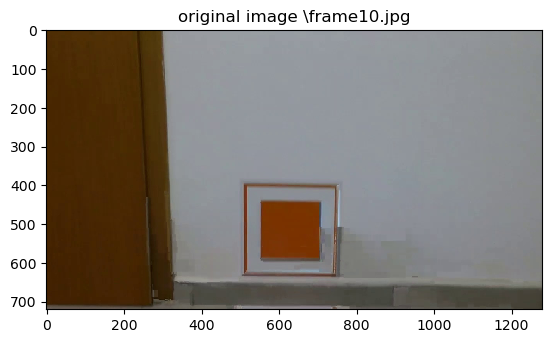

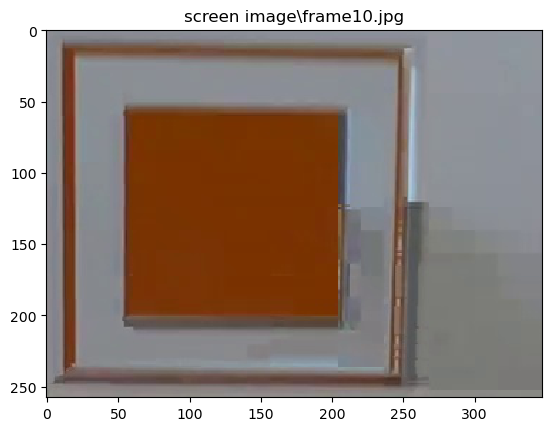

\frame11.jpg
\frame12.jpg
\frame13.jpg
\frame14.jpg
\frame15.jpg
\frame16.jpg
\frame17.jpg
\frame18.jpg
\frame19.jpg
\frame20.jpg
\frame21.jpg
\frame22.jpg
\frame23.jpg
\frame24.jpg
\frame25.jpg
\frame26.jpg
\frame27.jpg
xc 308, yc 12, w 972, h 708


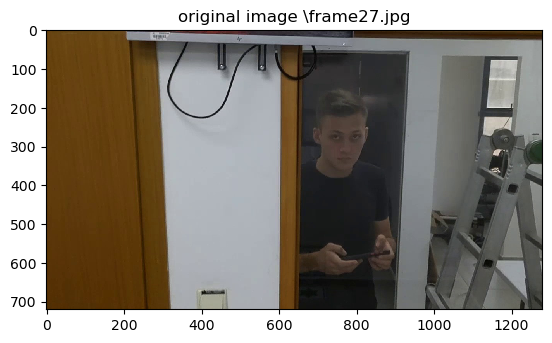

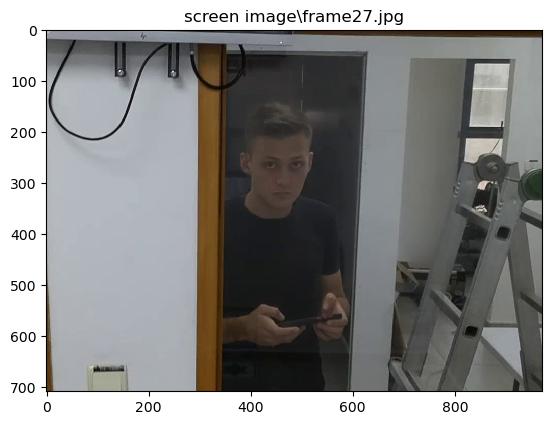

\frame28.jpg
\frame29.jpg
xc 321, yc 15, w 959, h 705


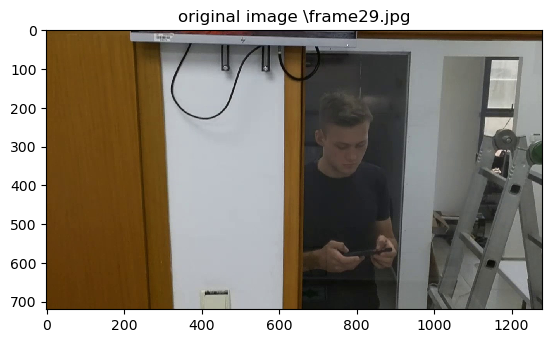

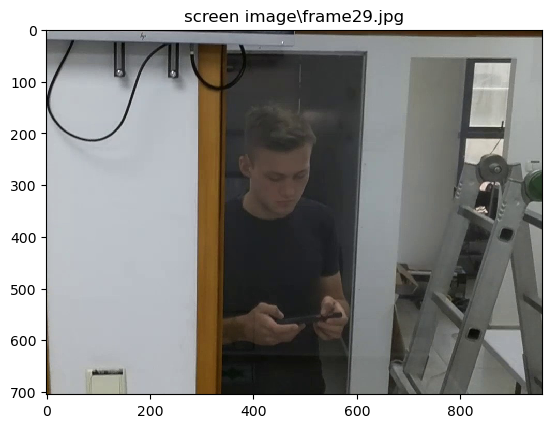

\frame30.jpg
\frame31.jpg
xc 636, yc 271, w 644, h 449


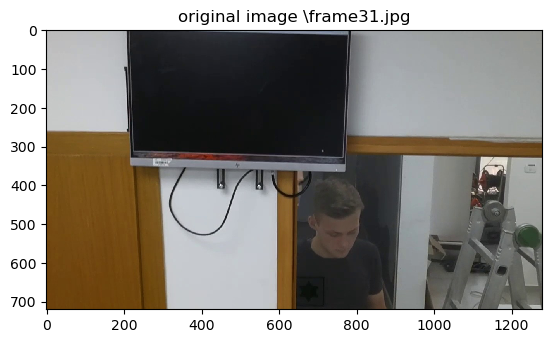

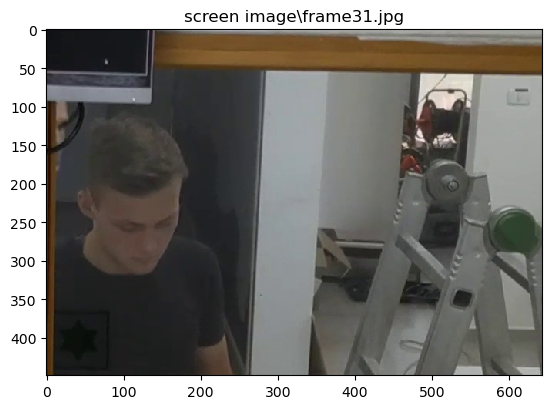

\frame32.jpg
xc 217, yc 27, w 550, h 316


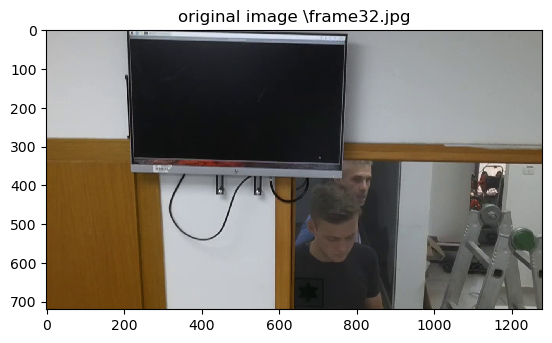

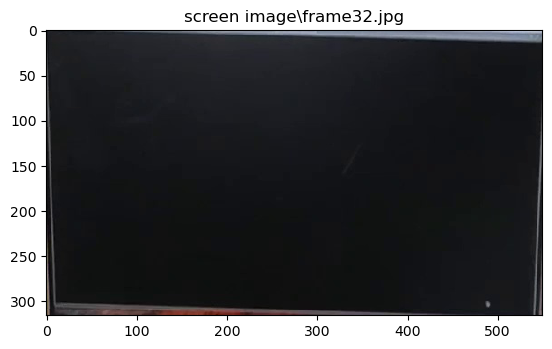

\frame33.jpg
xc 739, yc 334, w 541, h 386


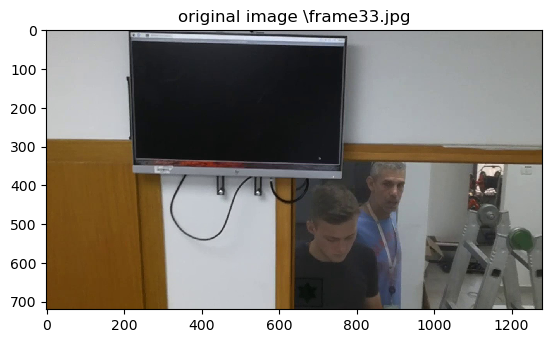

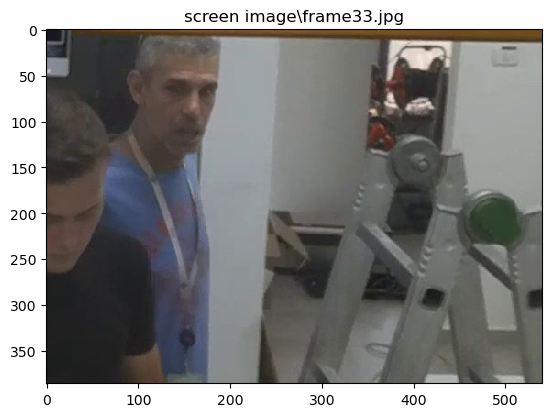

xc 216, yc 15, w 549, h 334


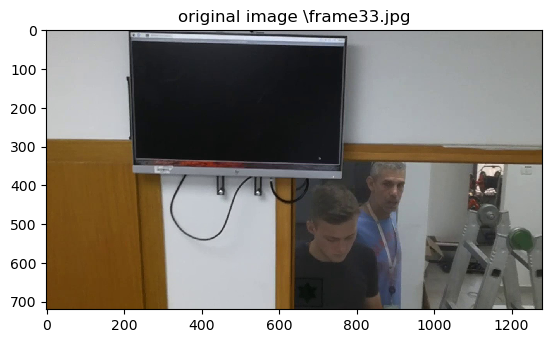

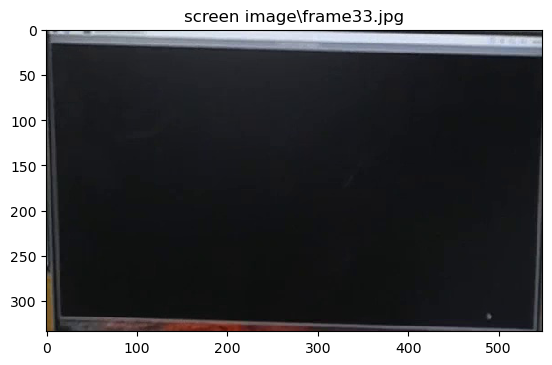

\frame34.jpg
\frame35.jpg
\frame36.jpg
xc 980, yc 511, w 300, h 209


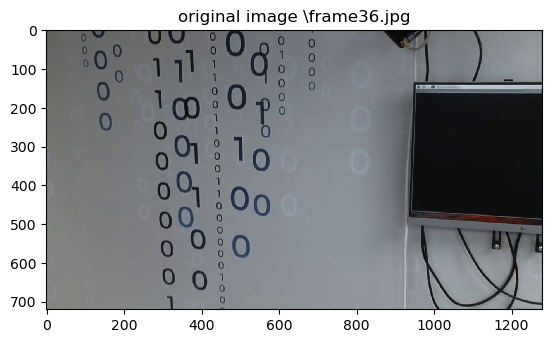

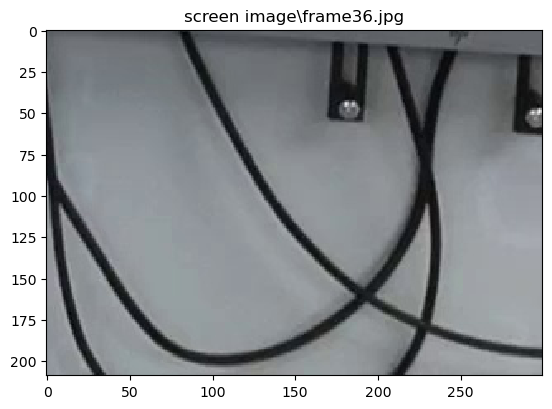

\frame37.jpg
xc 835, yc 162, w 445, h 318


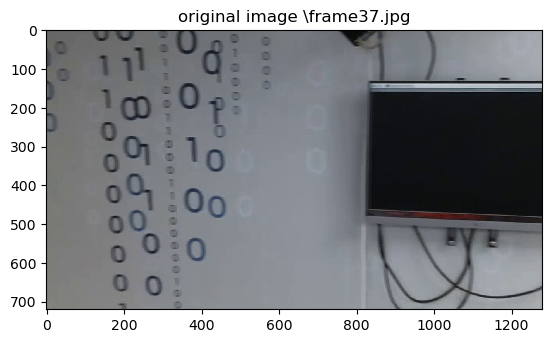

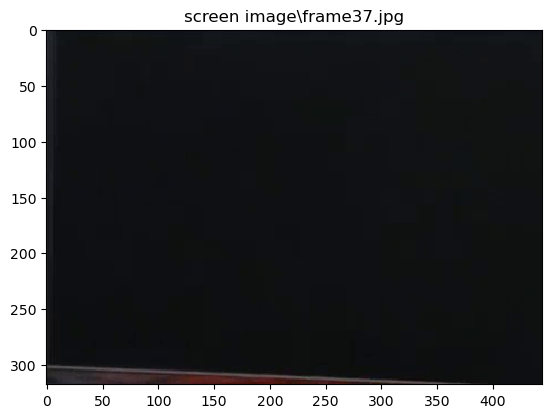

\frame38.jpg
xc 885, yc 427, w 395, h 293


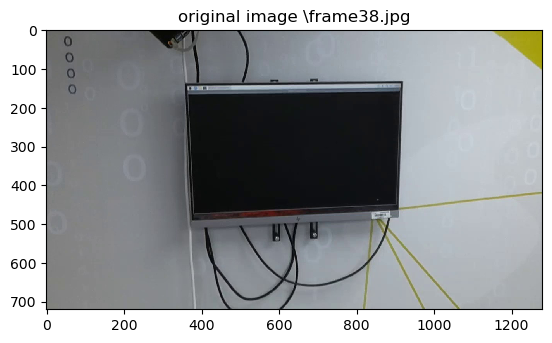

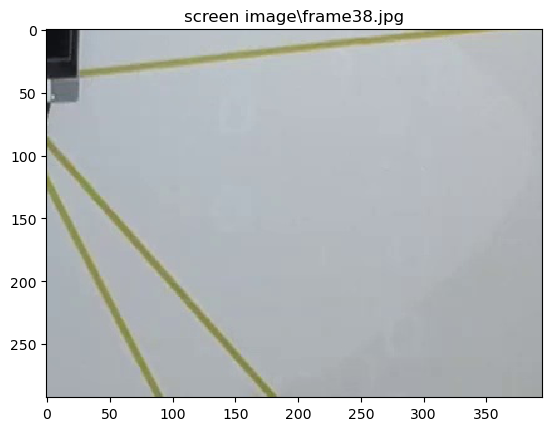

xc 370, yc 162, w 541, h 310


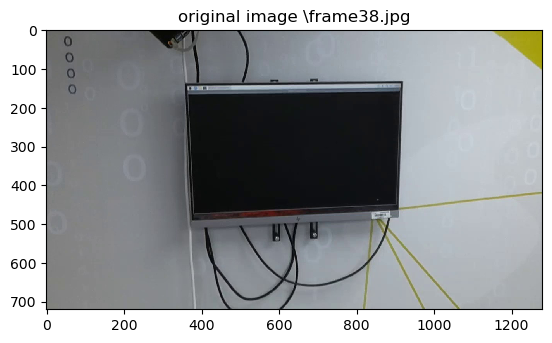

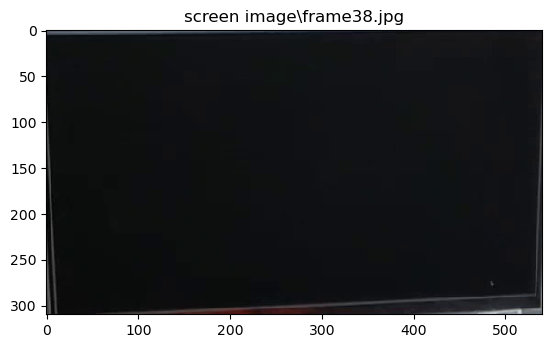

\frame39.jpg
xc 836, yc 409, w 444, h 311


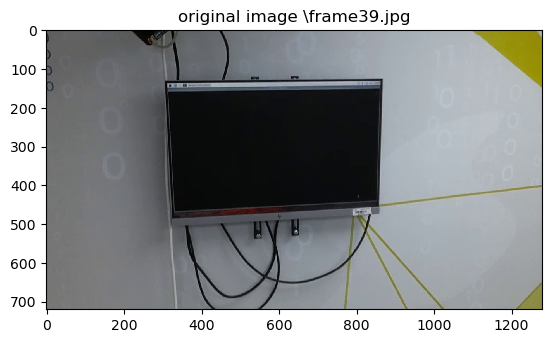

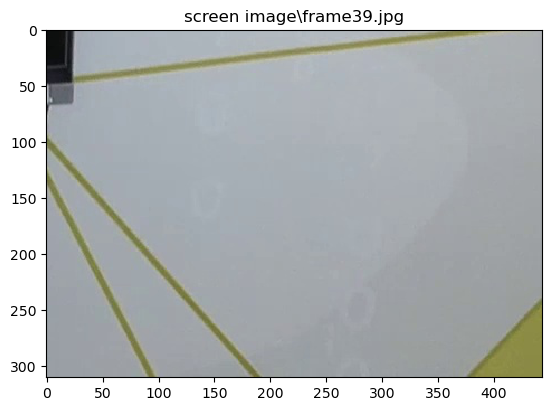

xc 316, yc 156, w 545, h 314


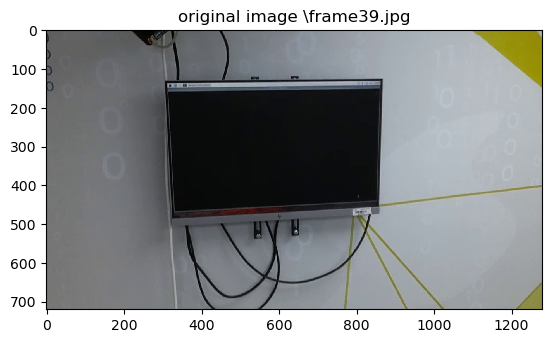

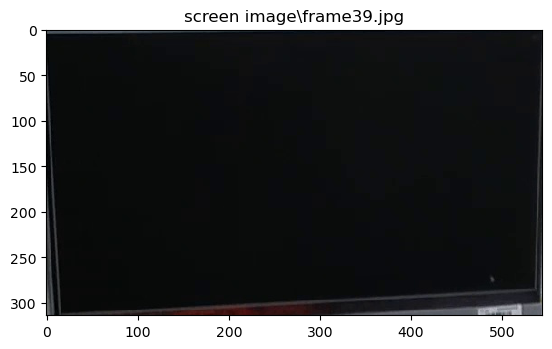

xc 328, yc 141, w 540, h 344


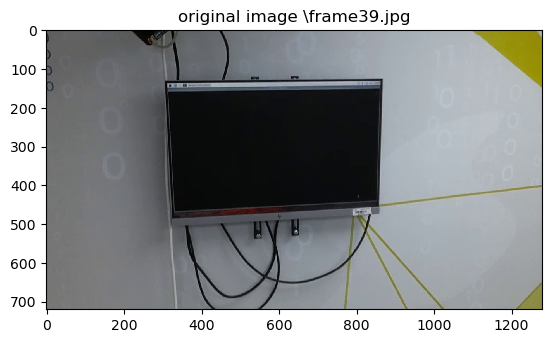

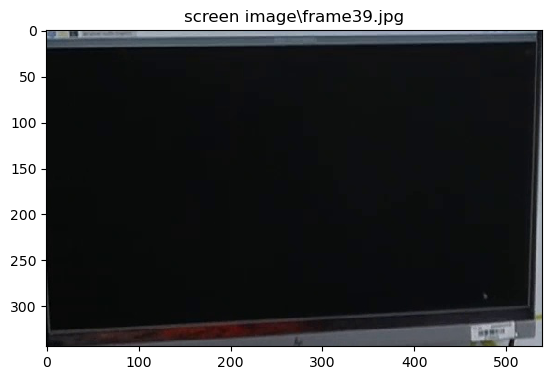

\frame40.jpg


In [94]:
finished = False
frame_count = 0
maxcountt = 42
maxcount = min(maxcountt, len(onlyfiles) -1)
while not finished and frame_count+1 < maxcount:
    frame_name = r"\frame" + str(frame_count) + ".jpg"
    print(frame_name)
    frame_count += 1
    if exists(mypath + frame_name):
        ReadFileFun(frame_name , mypath)
    else:
        finished = True

number of detected contours is: 389
xc 871, yc 450, w 409, h 270
2000
[0, 0, 0]
black
black screen


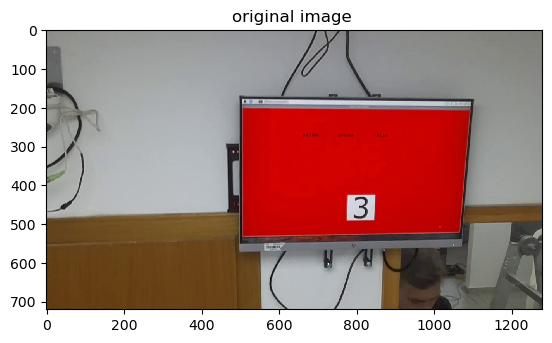

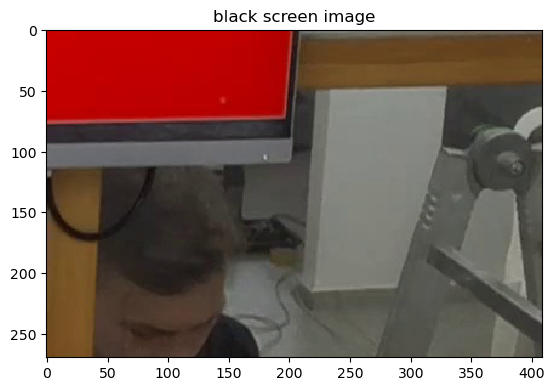

xc 535, yc 180, w 567, h 370
348
[0, 0, 0]
black
black screen


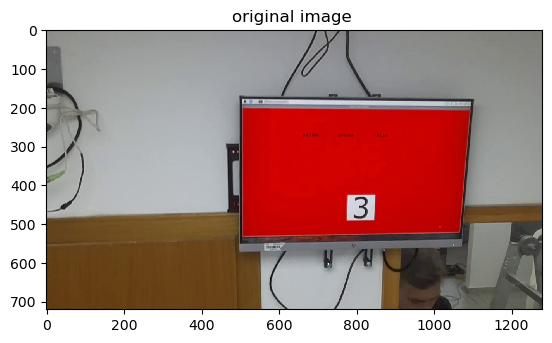

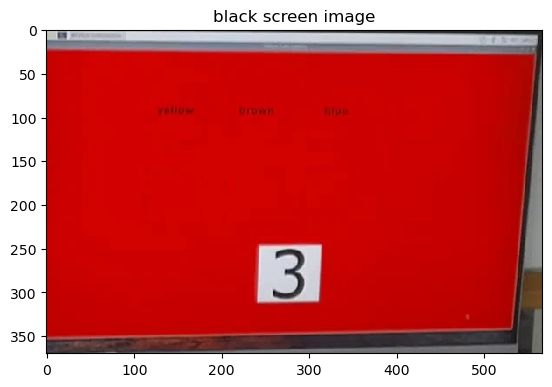

In [150]:
file_full_path = r"C:\Users\davidra\Desktop\NINJA_RAFAEL\Ninja2-master\Simon_Resources\pics_from_tello_pov\frame168.jpg"
img = cv2.imread(file_full_path)
#PlotCv2ImageWithPlt(img, "original image "+ str(file_name))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
dst = cv2.Canny(gray, 0, 150)
blured = cv2.blur(dst, (5,5), 0)    
MIN_CONTOUR_AREA=800 # 1200
img_thresh = cv2.adaptiveThreshold(blured, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
Contours,imgContours = cv2.findContours(img_thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
i = 0;
print(f"number of detected contours is: {len(Contours)}")
for contour in Contours:
    (xc,yc,w,h) = cv2.boundingRect(contour)
    
    if (w > 200) and (h >200) and (yc > 1) and (xc > 1) and (1.8*h>w>1.3*h):
        i += 1
        print (f"xc {xc}, yc {yc}, w {w}, h {h}")
        cropped_image = img[yc:yc+h,xc:xc+w]                     
        if i==1 :
            bb = (0,0,0,0)
        print(np.abs(xc+yc+w+h-bb[0]-bb[1]-bb[2]-bb[3]))
        if np.abs(xc+yc+w+h-bb[0]-bb[1]-bb[2]-bb[3]) > 150:
            bb = (xc,yc,w,h)
            #color_tuple = get_dominant_color(file_full_path, bb)
            color_tuple = get_dominant_color2(cropped_image, bb)
            #PlotCv2ImageWithPlt(img, "original image ")
            #PlotCv2ImageWithPlt(cropped_image, "screen image")
            print(color_tuple)
            print(GetColorName(color_tuple))
            if DistanceBetweenTwoTuples(color_tuple , (0,0,0)) <= 60:
                print("black screen")
                PlotCv2ImageWithPlt(img, "original image ")
                PlotCv2ImageWithPlt(cropped_image, "black screen image")                
            if DistanceBetweenTwoTuples(color_tuple , (170,170,170)) <= 60:
                print("silver screen")
                PlotCv2ImageWithPlt(img, "original image ")
                PlotCv2ImageWithPlt(cropped_image, "silver screen image")
            if DistanceBetweenTwoTuples(color_tuple , (200,0,0)) <= 60:
                print("red screen")
                PlotCv2ImageWithPlt(img, "original image ")
                PlotCv2ImageWithPlt(cropped_image, "red screen image")
            if DistanceBetweenTwoTuples(color_tuple , (20,70,20)) <= 60:
                print("green screen")
                PlotCv2ImageWithPlt(img, "original image ")
                PlotCv2ImageWithPlt(cropped_image, "green screen image")
